Mejia Polanco Angel Uriel 20390027

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc
from math import sqrt

# Understanding the Data

In [4]:
diabetes = pd.read_csv("diabetes_prediction_dataset.csv")
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Number of rows and columns

In [5]:
#Number of rows and columns
rows, columns = diabetes.shape
print(f"Number of Rows of Data= {rows}")
print(f"Number of columns of Data= {columns}")

Number of Rows of Data= 100000
Number of columns of Data= 9


# Number of categorical variables and number of unique values for each

In [6]:
categVaria = diabetes.select_dtypes(include='object').columns
totalCategVaria = len(categVaria)
print("Variables categóricas:", totalCategVaria)

for var in categVaria:
    uniqValues = diabetes[var].nunique()
    print(f"Los valores unicos destinados para {var}: {uniqValues}")

Variables categóricas: 2
Los valores unicos destinados para gender: 3
Los valores unicos destinados para smoking_history: 6


# Missing values

In [7]:
#Missing values
MissingValue = diabetes.isnull().any()
print(MissingValue)

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool


In [8]:
#Este segundo metodo permite comprobar el primer resultado, el cual es de tipo boleano. Y el segundo al de tipo int64, demuestra
#que el "false" del boleano y "0" del int64 coinciden en sus resultados. 
#Missing values
MissingValue = diabetes.isnull().sum()
print(MissingValue)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


# Summary statistics for attributes and labels

In [9]:
#Summary statistics for attributes and labels
SummaryStatic = diabetes.describe()
print(SummaryStatic)

                 age  hypertension  heart_disease            bmi   
count  100000.000000  100000.00000  100000.000000  100000.000000  \
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [14]:
dfDiabetes = pd.read_csv("diabetes_prediction_dataset.csv")
resultadoDiabetes = dfDiabetes.select_dtypes(include=[np.number]).values

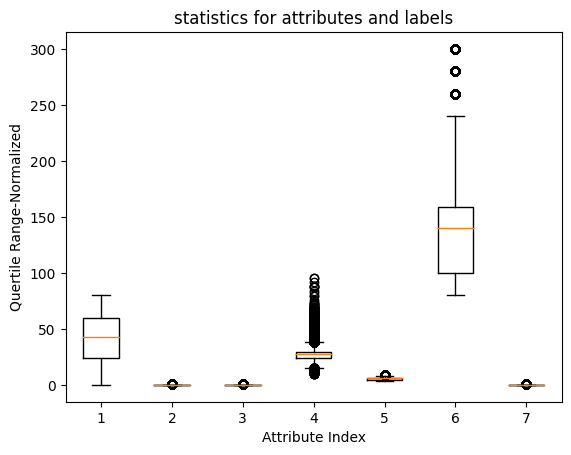

In [15]:
#plot data
plt.boxplot(resultadoDiabetes)
plt.xlabel("Attribute Index")
plt.ylabel("Quertile Range-Normalized")
plt.title("statistics for attributes and labels")
plt.show()

# Metricas para medir el desempeño de los modelos

In [17]:
DiabetesResult = dfDiabetes.select_dtypes(include=[float, int])

PrimeSet = DiabetesResult.drop("age", axis=1)
SegunSet = DiabetesResult["age"]

xTraining, xTest, yTraining, yTest = train_test_split(PrimeSet, SegunSet)

LinearResult = LinearRegression()
LinearResult.fit(xTraining, yTraining)

Predict = LinearResult.predict(xTest)

MSE = mean_squared_error(yTest, Predict)
RMSE = mean_squared_error(yTest, Predict, squared=False)
MAE = mean_absolute_error(yTest, Predict)

print("MSE =", MSE)
print ("RMSE =", RMSE)
print("MAE =", MAE)

MSE = 400.3079316438005
RMSE = 20.00769681007288
MAE = 16.761843642744886


In [18]:
DiabetesResult = dfDiabetes.select_dtypes(include=[float, int])

PrimeSet = DiabetesResult.drop("blood_glucose_level", axis=1)
SegunSet = DiabetesResult["blood_glucose_level"]

xTraining, xTest, yTraining, yTest = train_test_split(PrimeSet, SegunSet)

LinearResult = LinearRegression()
LinearResult.fit(xTraining, yTraining)

Predict = LinearResult.predict(xTest)

MSE = mean_squared_error(yTest, Predict)
RMSE = mean_squared_error(yTest, Predict, squared=False)
MAE = mean_absolute_error(yTest, Predict)

print("MSE =", MSE)
print ("RMSE =", RMSE)
print("MAE =", MAE)

MSE = 1367.3693284624305
RMSE = 36.97795733220577
MAE = 30.6966909179351


In [19]:
DiabetesResult = dfDiabetes.select_dtypes(include=[float, int])

PrimeSet = DiabetesResult.drop("diabetes", axis=1)
SegunSet = DiabetesResult["diabetes"]

xTraining, xTest, yTraining, yTest = train_test_split(PrimeSet, SegunSet)

LinearResult = LinearRegression()
LinearResult.fit(xTraining, yTraining)

Predict = LinearResult.predict(xTest)

MSE = mean_squared_error(yTest, Predict)
RMSE = mean_squared_error(yTest, Predict, squared=False)
MAE = mean_absolute_error(yTest, Predict)

print("MSE =", MSE)
print ("RMSE =", RMSE)
print("MAE =", MAE)

MSE = 0.05117784024563865
RMSE = 0.22622519807846042
MAE = 0.1542842126812781


# Receiver Operating Characteristics (ROC)

In [20]:
columnsNames = ['age','hypertension','heart_disease','bmi'
                      ,'blood_glucose_level','diabetes']

dfDiabetes['blood_glucose_level'] = dfDiabetes['blood_glucose_level'].apply(lambda x: 1 if x > 0 else 0)

SegunSet = dfDiabetes["blood_glucose_level"]
Result = pd.get_dummies(dfDiabetes[columnsNames])
PrimSet = pd.concat([Result, dfDiabetes[columnsNames]], axis=1)

xTraining, xTest, yTraining, yTest = train_test_split(PrimSet, SegunSet)

LinearResult = LinearRegression()
LinearResult.fit(xTraining, yTraining)

predict = LinearResult.predict(xTest)
fpr, tpr, thresholds = roc_curve(yTest, predict)
roc_auc = auc(fpr, tpr)

C:\Users\angel\OneDrive\Escritorio\IngConocimiento\Conocimiento\lib\site-packages\sklearn\metrics\_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [21]:
print("The fisrt five",predict[0:5],yTraining[0:5])

The fisrt five [1. 1. 1. 1. 1.] 59099    1
13027    1
79131    1
7263     1
10213    1
Name: blood_glucose_level, dtype: int64


In [22]:
roc_auc = auc(fpr,tpr)
print("AUC for in-sample ROC curve: %f" %roc_auc)

AUC for in-sample ROC curve: nan


<function matplotlib.pyplot.show(close=None, block=None)>

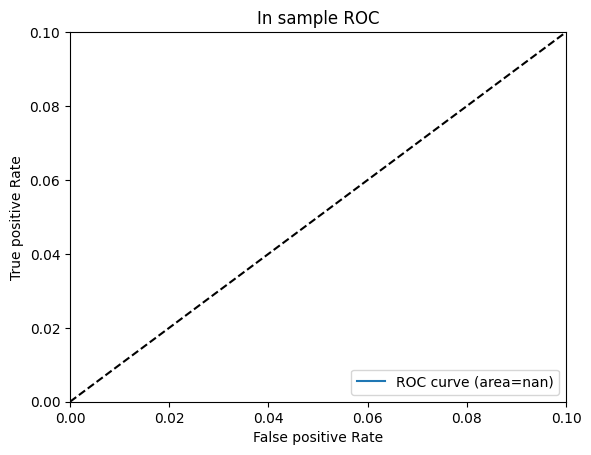

In [23]:
# Graficar la curva ROC
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,0.1])
plt.ylim([0.0,0.1])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('In sample ROC')
plt.legend(loc='lower right')
plt.show

In [24]:
columnsNames = ['age','hypertension','heart_disease','bmi'
                      ,'blood_glucose_level','diabetes']

dfDiabetes['diabetes'] = dfDiabetes['diabetes'].apply(lambda x: 1 if x > 0 else 0)

SegunSet = dfDiabetes["diabetes"]
Result = pd.get_dummies(dfDiabetes[columnsNames])
PrimSet = pd.concat([Result, dfDiabetes[columnsNames]], axis=1)

xTraining, xTest, yTraining, yTest = train_test_split(PrimSet, SegunSet)

LinearResult = LinearRegression()
LinearResult.fit(xTraining, yTraining)

predict = LinearResult.predict(xTest)
fpr, tpr, thresholds = roc_curve(yTest, predict)
roc_auc = auc(fpr, tpr)

In [25]:
print("The fisrt five",predict[0:5],yTraining[0:5])

The fisrt five [-2.52749210e-15 -7.38124839e-16  1.53089347e-16 -7.56339436e-16
 -5.72458747e-17] 25857    0
96794    0
43838    0
95558    0
41378    1
Name: diabetes, dtype: int64


In [26]:
roc_auc = auc(fpr,tpr)
print("AUC for in-sample ROC curve: %f" %roc_auc)

AUC for in-sample ROC curve: 1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

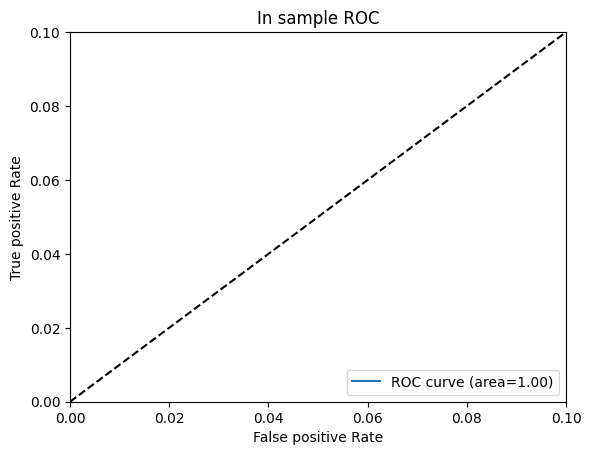

In [27]:
# Graficar la curva ROC
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,0.1])
plt.ylim([0.0,0.1])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('In sample ROC')
plt.legend(loc='lower right')
plt.show

# LassoCV demo with data normalization and no normalization

# Lasso Training on Full Data Set